In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # Visualization 
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization
from sklearn.preprocessing import MinMaxScaler
import torch # Library for implementing Deep Neural Network 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('C:\\Users\\DHAN RAJ\\Downloads\\btp_forecast_preprocessed_data\\delhi\\hourly\\imputed_hourly_delhi_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),RH (%),WS (m/s),WD (deg),SR (W/mt2)
0,2021-01-01 00:00:00,182.670,573.410000,308.850000,92.4000,296.220000,89.740000,13.700000,4.2900,16.5000,8.5200,87.990000,22.470000,39.150000,79.0500,0.2400,197.450000,46.580000
1,2021-01-01 01:00:00,172.260,596.900000,355.110000,91.1000,332.550000,90.130000,17.250000,4.6200,15.7900,8.4700,104.680000,22.090000,38.760000,81.6100,0.3100,145.170000,47.600000
2,2021-01-01 02:00:00,168.350,571.580000,458.040000,96.0500,417.520000,90.200000,23.020000,5.0000,18.4500,8.9000,101.630000,24.680000,40.860000,83.2600,0.2700,160.060000,47.780000
3,2021-01-01 03:00:00,178.900,606.030000,383.820000,92.5600,356.280000,90.680000,10.480000,3.8100,19.8000,7.9900,85.370000,21.960000,36.050000,84.8800,0.2800,164.680000,48.200000
4,2021-01-01 04:00:00,175.545,586.980000,376.455000,93.0275,350.642500,90.187500,16.112500,4.4300,17.6350,8.4700,94.917500,22.800000,38.705000,82.2000,0.2750,166.840000,47.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31 19:00:00,256.925,524.750000,31.605000,39.7850,40.980000,42.767500,29.433333,2.0850,12.6675,8.7250,15.050000,10.060000,6.725000,90.7325,0.5275,73.337500,35.900000
26276,2023-12-31 20:00:00,248.325,507.250000,21.990000,58.2000,42.840000,42.430000,29.025000,2.1200,19.4250,8.9375,15.080000,9.982500,6.657500,90.9875,0.4650,42.770000,35.825000
26277,2023-12-31 21:00:00,224.275,461.450000,21.757500,45.1925,37.575000,44.480000,25.300000,3.4400,14.4150,15.2400,17.815000,13.797500,11.527500,90.7900,0.3525,49.877500,35.800000
26278,2023-12-31 22:00:00,218.775,432.250000,18.345000,45.8050,33.862500,45.407500,24.150000,3.5425,16.7175,21.3800,26.100000,17.552500,15.067500,91.1600,0.6425,84.942500,35.875000


In [3]:
val = pd.read_excel("C:/Users/DHAN RAJ/Downloads/delhi_hourly_data_validation.xlsx")
df.set_index('Timestamp', inplace=True)

In [4]:
df

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),RH (%),WS (m/s),WD (deg),SR (W/mt2)
Timestamp,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,182.670,573.410000,308.850000,92.4000,296.220000,89.740000,13.700000,4.2900,16.5000,8.5200,87.990000,22.470000,39.150000,79.0500,0.2400,197.450000,46.580000
2021-01-01 01:00:00,172.260,596.900000,355.110000,91.1000,332.550000,90.130000,17.250000,4.6200,15.7900,8.4700,104.680000,22.090000,38.760000,81.6100,0.3100,145.170000,47.600000
2021-01-01 02:00:00,168.350,571.580000,458.040000,96.0500,417.520000,90.200000,23.020000,5.0000,18.4500,8.9000,101.630000,24.680000,40.860000,83.2600,0.2700,160.060000,47.780000
2021-01-01 03:00:00,178.900,606.030000,383.820000,92.5600,356.280000,90.680000,10.480000,3.8100,19.8000,7.9900,85.370000,21.960000,36.050000,84.8800,0.2800,164.680000,48.200000
2021-01-01 04:00:00,175.545,586.980000,376.455000,93.0275,350.642500,90.187500,16.112500,4.4300,17.6350,8.4700,94.917500,22.800000,38.705000,82.2000,0.2750,166.840000,47.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,256.925,524.750000,31.605000,39.7850,40.980000,42.767500,29.433333,2.0850,12.6675,8.7250,15.050000,10.060000,6.725000,90.7325,0.5275,73.337500,35.900000
2023-12-31 20:00:00,248.325,507.250000,21.990000,58.2000,42.840000,42.430000,29.025000,2.1200,19.4250,8.9375,15.080000,9.982500,6.657500,90.9875,0.4650,42.770000,35.825000
2023-12-31 21:00:00,224.275,461.450000,21.757500,45.1925,37.575000,44.480000,25.300000,3.4400,14.4150,15.2400,17.815000,13.797500,11.527500,90.7900,0.3525,49.877500,35.800000


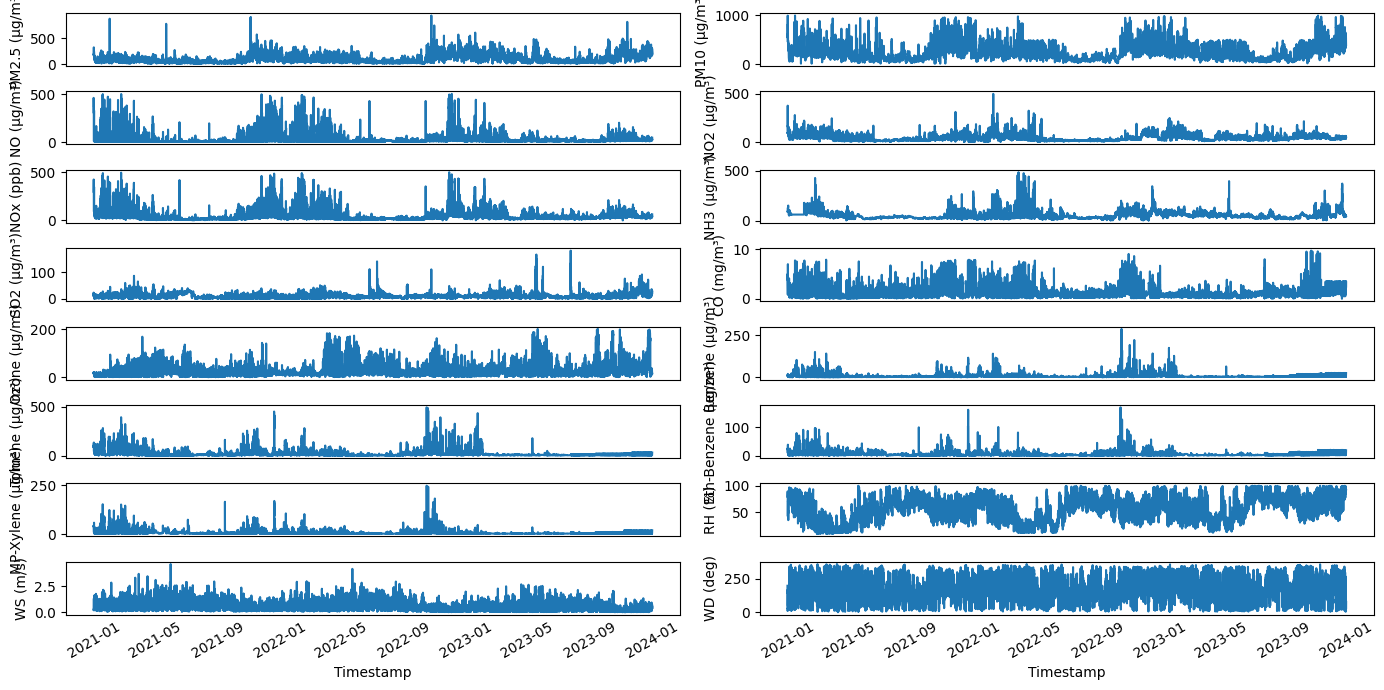

In [5]:
def data_plot(df):
	df_plot = df.copy()

	ncols = 2
	nrows = int(round(df_plot.shape[1] / ncols, 0))

	fig, ax = plt.subplots(nrows=nrows, ncols=ncols,
						sharex=True, figsize=(14, 7))
	for i, ax in enumerate(fig.axes):
		sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
		ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
		ax.xaxis.set_major_locator(mdates.AutoDateLocator())
	fig.tight_layout()
	plt.show()

data_plot(df)

In [6]:
training_data_len = math.ceil(len(df) * .8)
training_data_len
 
#Splitting the dataset
train_data = df[:training_data_len].iloc[:,:1]
test_data = df[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(21024, 1) (5256, 1)


In [7]:
dataset_train = np.reshape(train_data['PM2.5 (µg/m³)'], (-1,1))
dataset_train.shape

(21024, 1)

In [8]:
val['From Date'] = pd.to_datetime(val['From Date'])
val.set_index('From Date', inplace=True)

In [9]:
val

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,Temp,RH,WS,WD,SR,BP
From Date,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,192.07,353.65,23.25,50.18,37.56,42.58,21.00,1.17,11.01,4.81,8.69,3.50,2.84,2.35,11.04,91.46,0.46,111.17,35.38,NaN
2024-01-01 01:00:00,170.90,346.30,25.27,33.16,34.79,43.73,21.03,1.16,13.44,4.83,8.73,3.54,2.92,2.40,10.83,91.58,0.23,175.56,31.90,NaN
2024-01-01 02:00:00,155.45,352.10,30.97,46.68,47.57,42.32,19.23,1.57,20.02,4.99,8.78,3.54,2.96,2.41,10.75,91.32,0.27,252.47,35.33,NaN
2024-01-01 03:00:00,187.28,325.05,6.83,46.52,22.22,35.75,16.82,1.56,19.37,2.56,3.54,1.93,1.66,1.74,10.71,91.21,0.45,103.46,35.88,NaN
2024-01-01 04:00:00,127.58,298.98,26.97,48.75,44.48,31.11,12.93,1.57,25.49,3.67,3.04,2.40,2.01,1.52,10.62,91.23,0.57,155.82,35.73,NaN
2024-01-01 05:00:00,106.60,283.40,24.91,38.06,37.00,29.05,12.97,1.60,33.86,3.96,2.84,2.56,2.19,1.48,10.42,90.96,0.56,215.08,35.58,NaN
2024-01-01 06:00:00,115.92,268.12,17.94,26.91,24.81,30.56,17.33,1.52,1.69,7.61,10.66,5.55,4.83,5.00,10.13,91.39,0.72,266.55,35.23,NaN
2024-01-01 07:00:00,120.93,268.10,31.00,31.68,37.40,27.90,17.45,1.60,1.36,7.90,10.85,5.96,4.74,5.08,9.94,91.88,0.44,183.18,37.85,NaN
2024-01-01 08:00:00,121.00,267.12,26.47,35.80,37.35,26.14,17.37,1.06,4.02,2.80,4.81,2.74,2.20,2.35,9.96,91.06,0.36,215.47,50.35,NaN


In [10]:
dataset_val = np.reshape(val['PM2.5'], (-1,1))
dataset_val.shape

(24, 1)

In [11]:
dataset_test = np.reshape(test_data['PM2.5 (µg/m³)'], (-1,1))
dataset_test.shape

(5256, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5]) #prints the first 5 rows of scaled_test

[[0.18929256]
 [0.17820158]
 [0.1740358 ]
 [0.18527594]
 [0.18170147]]
[0.07259136] [0.04086739] [0.03450406] [0.10641584] [0.04716894]


In [13]:
# Create sequences and labels for training data
sequence_length = 48 # Number of time steps to look back
X_train, y_train = [], []
for i in range(len(scaled_train) - sequence_length):
	X_train.append(scaled_train[i:i+sequence_length])
	y_train.append(scaled_train[i+1:i+sequence_length+1])
X_train, y_train = np.array(X_train), np.array(y_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train.shape,y_train.shape

(torch.Size([20976, 48, 1]), torch.Size([20976, 48, 1]))

In [14]:
# Create sequences and labels for testing data
sequence_length = 24 # Number of time steps to look back
X_test, y_test = [], []
for i in range(len(scaled_test) - sequence_length):
	X_test.append(scaled_test[i:i+sequence_length])
	y_test.append(scaled_test[i+1:i+sequence_length+1])
X_test, y_test = np.array(X_test), np.array(y_test)

# Convert data to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_test.shape, y_test.shape

(torch.Size([5232, 24, 1]), torch.Size([5232, 24, 1]))

In [15]:
class LSTMModel(nn.Module):
	# input_size : number of features in input at each time step
	# hidden_size : Number of LSTM units 
	# num_layers : number of LSTM layers 
	def __init__(self, input_size, hidden_size, num_layers): 
		super(LSTMModel, self).__init__() #initializes the parent class nn.Module
		self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
		self.linear = nn.Linear(hidden_size, 1)

	def forward(self, x): # defines forward pass of the neural network
		out, _ = self.lstm(x)
		out = self.linear(out)
		return out

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [17]:
input_size = 1
num_layers = 2
hidden_size = 64
output_size = 1

# Define the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model)

LSTMModel(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)


In [18]:
batch_size = 16
# Create DataLoader for batch training
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# Create DataLoader for batch training
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
num_epochs = 150
train_hist =[]
test_hist =[]
# Training loop
for epoch in range(num_epochs):
	total_loss = 0.0

	# Training
	model.train()
	for batch_X, batch_y in train_loader:
		batch_X, batch_y = batch_X.to(device), batch_y.to(device)
		predictions = model(batch_X)
		loss = loss_fn(predictions, batch_y)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		total_loss += loss.item()

	# Calculate average training loss and accuracy
	average_loss = total_loss / len(train_loader)
	train_hist.append(average_loss)

	# Validation on test data
	model.eval()
	with torch.no_grad():
		total_test_loss = 0.0

		for batch_X_test, batch_y_test in test_loader:
			batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
			predictions_test = model(batch_X_test)
			test_loss = loss_fn(predictions_test, batch_y_test)

			total_test_loss += test_loss.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(test_loader)
		test_hist.append(average_test_loss)
	if (epoch+1)%10==0:
		print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')

Epoch [10/150] - Training Loss: 0.0013, Test Loss: 0.0019
Epoch [20/150] - Training Loss: 0.0012, Test Loss: 0.0017
Epoch [30/150] - Training Loss: 0.0012, Test Loss: 0.0017
Epoch [40/150] - Training Loss: 0.0011, Test Loss: 0.0017
Epoch [50/150] - Training Loss: 0.0011, Test Loss: 0.0017
Epoch [60/150] - Training Loss: 0.0011, Test Loss: 0.0017
Epoch [70/150] - Training Loss: 0.0011, Test Loss: 0.0017
Epoch [80/150] - Training Loss: 0.0011, Test Loss: 0.0018
Epoch [90/150] - Training Loss: 0.0011, Test Loss: 0.0018
Epoch [100/150] - Training Loss: 0.0011, Test Loss: 0.0018
Epoch [110/150] - Training Loss: 0.0010, Test Loss: 0.0019
Epoch [120/150] - Training Loss: 0.0010, Test Loss: 0.0018
Epoch [130/150] - Training Loss: 0.0010, Test Loss: 0.0020
Epoch [140/150] - Training Loss: 0.0010, Test Loss: 0.0019
Epoch [150/150] - Training Loss: 0.0010, Test Loss: 0.0020


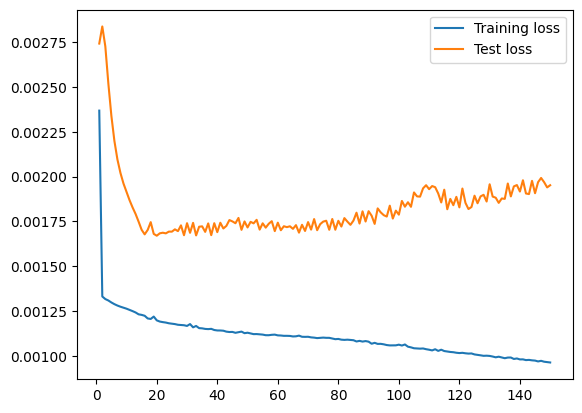

In [20]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_hist,scalex=True, label="Training loss")
plt.plot(x, test_hist, label="Test loss")
plt.legend()
plt.show()

In [21]:
origin = '2022-01-01 00:00:00'
start = '2024-01-01 00:00:00'
end = '2024-01-01 23:00:00'
time_period = pd.date_range(start,end,freq='h')
val['From Date'] = time_period

In [22]:
# Define the number of future time steps to forecast
num_forecast_steps = 24

# Convert to NumPy and remove singleton dimensions
sequence_to_plot = X_test.squeeze().cpu().numpy()

# Use the last 30 data points as the starting point
historical_data = sequence_to_plot[-1]

# Initialize a list to store the forecasted values
forecasted_values = []

# Use the trained model to forecast future values
with torch.no_grad():
	for _ in range(num_forecast_steps*2):
		# Prepare the historical_data tensor
		historical_data_tensor = torch.as_tensor(historical_data).view(1, -1, 1).float().to(device)
		# Use the model to predict the next value
		predicted_value = model(historical_data_tensor).cpu().numpy()[0, 0]

		# Append the predicted value to the forecasted_values list
		forecasted_values.append(predicted_value[0])

		# Update the historical_data sequence by removing the oldest value and adding the predicted value
		historical_data = np.roll(historical_data, shift=-1)
		historical_data[-1] = predicted_value

		
# Generate futute dates
last_date = test_data.index[-1]

# Generate the next 24 hours
future_dates = time_period
# Concatenate the original index with the future dates
combined_index = test_data.index.append(future_dates)

C:\Users\DHAN RAJ\AppData\Local\Temp\ipykernel_16336\3769031218.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  historical_data[-1] = predicted_value


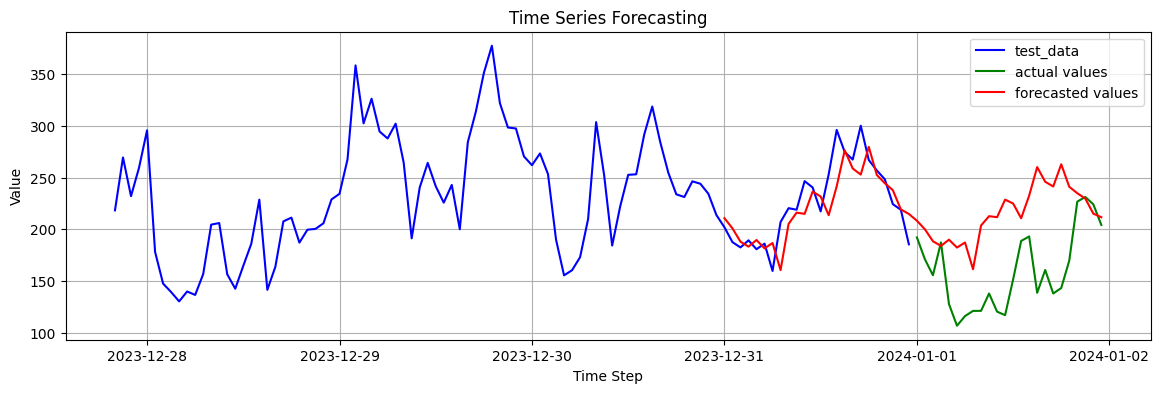

In [23]:
#set the size of the plot 
plt.rcParams['figure.figsize'] = [14, 4] 

#Test data
plt.plot(test_data['PM2.5 (µg/m³)'].index[-100:], test_data['PM2.5 (µg/m³)'][-100:], label = "test_data", color = "b") 
#reverse the scaling transformation
original_cases = scaler.inverse_transform(np.expand_dims(sequence_to_plot[-1], axis=0)).flatten() 

#the historical data used as input for forecasting
plt.plot(combined_index[-24:], val['PM2.5'], label='actual values', color='green') 

#Forecasted Values 
#reverse the scaling transformation
forecasted_cases = scaler.inverse_transform(np.expand_dims(forecasted_values, axis=0)).flatten() 
# plotting the forecasted values
plt.plot(combined_index[-48:], forecasted_cases, label='forecasted values', color='red') 

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Forecasting')
plt.grid(True)


In [24]:
mae = (forecasted_cases[-24:] - val['PM2.5']).abs().mean()

In [25]:
mae

56.452132822672525

Text(0.5, 1.0, 'Time Series Forecasting')

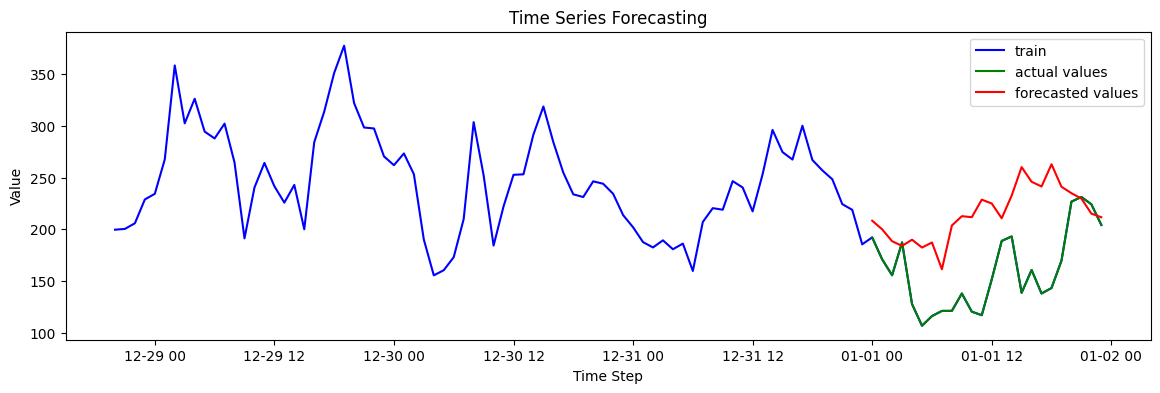

In [26]:
#set the size of the plot 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 4] 
val.index = combined_index[-24:]
test_data_ = pd.concat([test_data['PM2.5 (µg/m³)'],val['PM2.5']])
test_data_.columns = 'PM2.5 (µg/m³)'
#Test data
plt.plot(test_data_.index[-100:], test_data_[-100:], label = "train", color = "b") 
#reverse the scaling transformation
original_cases = scaler.inverse_transform(np.expand_dims(sequence_to_plot[-1], axis=0).reshape(-1,1)).flatten() 

#the historical data used as input for forecasting
plt.plot(combined_index[-24:], val['PM2.5'], label='actual values', color='green') 

#Forecasted Values 
#reverse the scaling transformation
forecasted_cases = scaler.inverse_transform(np.expand_dims(forecasted_values, axis=0)).flatten() 
# plotting the forecasted values
plt.plot(combined_index[-24:], forecasted_cases[-24:], label='forecasted values', color='red') 

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Forecasting')